In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf

from tensorflow import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, GRU
from keras.layers import LSTM, Reshape, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from collections import Counter

import numpy as np
import os
from mido import MidiFile, MidiTrack, Message
import mido

from scipy.special import softmax
import NoteBins

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
paths = []
songs = []
for r, d, f in os.walk(r"C:\Users\Vee\Desktop\python\blues"):
    for file in f:
        if '.mid' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    mid = MidiFile(path, type = 1)
    songs.append(mid)

In [5]:
notes = []
dataset = []
fuckboy = []

In [6]:
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 20 == 0):
            dataset.append(fuckboy)
            fuckboy = []
    fuckboy = []
    notes = []

In [7]:
dataset = np.array(dataset)
dataset.shape

(1839, 20, 1)

In [8]:
bruv = []
#for each in midi object in list of songs
for i in range(len(songs)):
    #for each note in midi object
    for msg in songs[i]:
        #filtering out meta messages
        if not msg.is_meta:
            #filtering out control changes
            if (msg.type == 'note_on'):
                #normalizing note and velocity values
                notes.append([NoteBins.note_reg(msg.note)/11])
    for i in range(1, len(notes)):
        fuckboy.append(notes[i])
        if (i % 20 == 0):
            bruv.append(fuckboy[0:4])
            fuckboy = []
    fuckboy = []
    notes = []

In [9]:
bruv = np.array(bruv)
bruv.shape

(1839, 4, 1)

In [10]:
#splitting data into train and test sets. 3/4 train, 1/4 test.
x_train,x_test,y_train,y_test = train_test_split(bruv, dataset, test_size=0.2, shuffle=False, random_state=42)

In [46]:
# define model
model = Sequential()
#shaping input to match data
model.add(LSTM(4, activation = 'tanh', input_shape=(4, 1), recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True))
#specifying output to have 40 timesteps
model.add(RepeatVector(20))
#specifying 1 feature as the output
model.add(LSTM(64, activation = 'tanh', return_sequences=True, recurrent_activation='sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, dropout = 0.2))
model.add(LSTM(128, activation = 'sigmoid', return_sequences=True, dropout = 0.2, recurrent_dropout=0.5 , recurrent_activation='tanh'))
model.add(LSTM(256, activation = 'sigmoid', return_sequences=True, dropout = 0.2, recurrent_dropout=0.5 , recurrent_activation='tanh'))
model.add(TimeDistributed(Dense(512, activation = 'selu')))
model.add(TimeDistributed(Dense(1024, activation = 'selu')))
model.add(TimeDistributed(Dense(1, activation = 'selu')))
model.compile(loss='mean_absolute_error', optimizer='adam')
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 4)                 96        
_________________________________________________________________
repeat_vector_10 (RepeatVect (None, 20, 4)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 20, 64)            17664     
_________________________________________________________________
lstm_24 (LSTM)               (None, 20, 128)           98816     
_________________________________________________________________
lstm_25 (LSTM)               (None, 20, 256)           394240    
_________________________________________________________________
time_distributed_24 (TimeDis (None, 20, 512)           131584    
_________________________________________________________________
time_distributed_25 (TimeDis (None, 20, 1024)        

In [47]:
history = model.fit(bruv, dataset, epochs=20, batch_size=200, verbose=1,validation_data=(x_test, y_test))

Train on 1839 samples, validate on 368 samples
Epoch 1/20
1839/1839 [==============================] - 5s 3ms/step - loss: 0.3205 - val_loss: 0.2814
Epoch 2/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2700 - val_loss: 0.2751
Epoch 3/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2673 - val_loss: 0.2799
Epoch 4/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2669 - val_loss: 0.2784
Epoch 5/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2662 - val_loss: 0.2759
Epoch 6/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2653 - val_loss: 0.2751
Epoch 7/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2651 - val_loss: 0.2745
Epoch 8/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2646 - val_loss: 0.2726
Epoch 9/20
1839/1839 [==============================] - 2s 1ms/step - loss: 0.2642 - val_loss: 0.2722
Epoch 10/20
1839/1839 [============

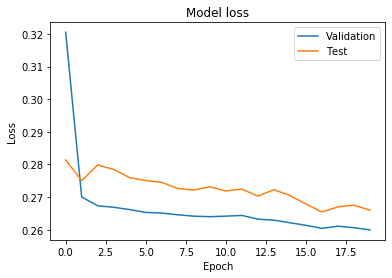

In [48]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation', 'Test'], loc='upper right')
plt.show()

In [201]:
j = 0
fuckie = [[[0], [11], [5], [1]]]
fuckie = np.array(fuckie)
fuckie.reshape(1,4,1)
predict = model.predict(bruv)
#disregarding negative values
predict = abs(predict)

jamie = model.predict_on_batch(fuckie)

In [202]:
#adjusting from normalization
for x in range(20):
    jamie[0][x][0] = abs(jamie[0][x][0] * 11)
    while(jamie[0][x][0] > 127):
        jamie[0][x][0] = jamie[0][x][0] / 10

In [203]:
jamie
#jamie[0][0][0]

array([[[ 9.024078 ],
        [11.781755 ],
        [12.728604 ],
        [12.066352 ],
        [10.794249 ],
        [ 9.626781 ],
        [ 8.803759 ],
        [ 8.270329 ],
        [ 7.9140053],
        [ 7.6591725],
        [ 7.4778514],
        [ 7.3626633],
        [ 7.3068943],
        [ 7.2982154],
        [ 7.322666 ],
        [ 7.367214 ],
        [ 7.4208603],
        [ 7.476285 ],
        [ 7.528892 ],
        [ 7.576095 ]]], dtype=float32)

In [208]:
#forced mode
mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)
octave = 12 * 4

track.append(Message('program_change', program=2,time=0))
for x in range(5):
    for i in range(11):
        track.append(Message('note_on', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=64, time=20))
        track.append(Message('note_off', note= octave + NoteBins.note_reg(int(jamie[0][i][0])), velocity=64, time=200))
mid.save('jamie.mid')

In [140]:
#from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
#model.save('my_model.h5')